## Understanding the results of classification models

#### Summary

#### Data colection, data pre-processing( Outlier treatment, missing value imputation, variable transformation), Model train (test-train-split), then select the best model .

## Simple Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv(".\Desktop\Movie_classification.csv", header=0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.info()
# There are missing values in Time_Taken

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Missing values 

In [5]:
df['Time_taken'].mean()

157.39149797570855

In [6]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(),inplace=True) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Dummy variable creation

In [8]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [9]:
#df=df.drop('Start_Tech_Oscar',axis=1,inplace=True)

In [10]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)


In [11]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


#### X-Y Split

In [12]:
x=df.loc[:,df.columns!='Collection']
type(x)

pandas.core.frame.DataFrame

In [13]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,1,0,0,1,0


In [14]:
x.shape

(506, 20)

In [15]:
y=df['Collection']
type(y)

pandas.core.series.Series

In [16]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [17]:
y.shape

(506,)

### Test-train split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,1,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,1,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,1,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,0,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,1,1,0,0,0


In [20]:
x_train.shape

(404, 20)

In [21]:
x_test.shape

(102, 20)

### Testing regression Tree

In [22]:
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=3)


In [23]:
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

#### Predicting values using trained model

In [24]:
y_train_pred=regtree.predict(x_train)
y_test_pred=regtree.predict(x_test)

#### Model performance

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mean_squared_error(y_test,y_test_pred)

139740942.91784033

In [27]:
r2_score(y_train,y_train_pred)

0.8364651040556869

In [28]:
r2_score(y_test,y_test_pred)

0.5659203159203307

#### Plotting decision tree

In [29]:
dot_data=tree.export_graphviz(regtree,out_file=None)

In [30]:
from IPython.display import Image

In [31]:
from graphviz import Digraph
import pydotplus

In [32]:
graph=pydotplus.graph_from_dot_data(dot_data)
#Image(data=graph,graph.create_png())

### Pruning a tree
#### Controlling Tree Growth
##### Maximum number of levels in tree

In [33]:
regtree1=tree.DecisionTreeRegressor(max_depth=3)
regtree1.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree1,out_file=None,feature_names=x_train.columns,filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data)
#mage(data=None,graph1.create_png())

In [34]:
graph1

##### Minimum obeservations at leaf node

In [35]:
regtree1=tree.DecisionTreeRegressor(min_samples_split=40)
regtree1.fit(x_train,y_train)
dot_data=tree.export_graphviz(regtree1,out_file=None,feature_names=x_train.columns,filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data)
#Image(data=None,graph1.create_png())

# CLASSIFICATION TREE

In [36]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [38]:
df.shape

(506, 21)

## x-y split

In [39]:
x=df.loc[:,df.columns!="Start_Tech_Oscar"]
type(x)

pandas.core.frame.DataFrame

In [40]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [41]:
x.shape

(506, 20)

In [42]:
y=df["Start_Tech_Oscar"]
type(y)

pandas.core.series.Series

In [43]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [44]:
y.shape

(506,)

## Test_train split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
x_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


In [47]:
x_train.shape

(404, 20)

In [48]:
x_test.shape

(102, 20)

## Training classification tree

In [49]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [50]:
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

### predict values

In [51]:
y_train_pred=clftree.predict(x_train)
y_test_pred=clftree.predict(x_test)

In [52]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

## Model performance

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [54]:
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [55]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [56]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

### Ploting decision tree

In [57]:
dot_data=tree.export_graphviz(clftree,out_file=None,feature_names=x_train.columns,filled=True)


In [58]:
from IPython.display import Image

In [59]:
import pydotplus

In [60]:
graph=pydotplus.graph_from_dot_data(dot_data)
#Image(graph.create_png())

### Controlling tree

In [61]:
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clftree2.fit(x_train,y_train)
dot_data=tree.export_graphviz(clftree2,out_file=None,feature_names=x_train.columns,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
#Image(graph2.create_png())

In [62]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier()

In [63]:
from sklearn.ensemble import BaggingClassifier

In [64]:
bag_clf=BaggingClassifier(base_estimator=clftree,n_estimators=1000,#if you have a small data set you can increase the n_estimators.
                         bootstrap=True,n_jobs=-1,
                         random_state=42)

In [65]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [66]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [67]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.6176470588235294

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1, random_state=42)

In [70]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [71]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [72]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.6372549019607843

### Grid search

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
rf_clf=RandomForestClassifier(n_estimators=250,random_state=42)

In [75]:
params_grid={'max_features':[4,5,6,7,8,9,10],
            'min_samples_split':[2,3,10]}

In [76]:
grid_search=GridSearchCV(rf_clf,params_grid,
                        n_jobs=-1,cv=5,scoring='accuracy')

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [78]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [79]:
cvrf_clf=grid_search.best_estimator_

In [80]:
cvrf_clf

RandomForestClassifier(max_features=6, min_samples_split=3, n_estimators=250,
                       random_state=42)

In [81]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[25, 19],
       [19, 39]], dtype=int64)

In [82]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6274509803921569

## Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gbc_clf=GradientBoostingClassifier()
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [85]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.5784313725490197

In [86]:
gbc_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)
gbc_clf2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [87]:
accuracy_score(y_train,gbc_clf2.predict(x_train))

0.7623762376237624

In [88]:
accuracy_score(y_test,gbc_clf2.predict(x_test))

0.6176470588235294

### Ada Boost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
ada_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [91]:
ada_clf

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [92]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [93]:
accuracy_score(y_train,ada_clf.predict(x_train))

0.8886138613861386

In [94]:
accuracy_score(y_test,ada_clf.predict(x_test))

0.6274509803921569

In [95]:
ada_clf2=AdaBoostClassifier(rf_clf,learning_rate=0.05,n_estimators=5000)

In [96]:
ada_clf2.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=5000)

In [97]:
accuracy_score(y_test,ada_clf2.predict(x_test))

0.6078431372549019

### XG Boost

In [98]:
import xgboost as xgb

In [99]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [100]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [101]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.6666666666666666

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

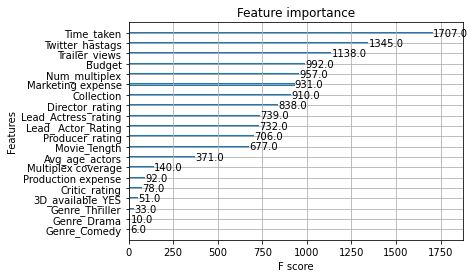

In [102]:
xgb.plot_importance(xgb_clf)

In [103]:
xgb_clf=xgb.XGBClassifier(n_estimator=500,learning_rate=0.1,random_state=42)

In [104]:
param_test1={
    'max_depth':range(3,10,2),'gamma':[0.1,0.2,0.3],'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],'reg_alpha':[1e-2,0.1,1]
}

In [105]:
param_test1

{'max_depth': range(3, 10, 2),
 'gamma': [0.1, 0.2, 0.3],
 'subsample': [0.8, 0.9],
 'colsample_bytree': [0.8, 0.9],
 'reg_alpha': [0.01, 0.1, 1]}

In [106]:
grid_search=GridSearchCV(xgb_clf,param_test1,n_jobs=-1,scoring='accuracy')

In [107]:
grid_search.fit(x_train,y_train)

[04:41:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_to_o...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimator=500, n_estimators=100,
                                  

In [108]:
cvxg_clf=grid_search.best_estimator_

In [109]:
accuracy_score(y_test,cvxg_clf.predict(x_test))

0.6176470588235294

In [110]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 5,
 'reg_alpha': 0.01,
 'subsample': 0.8}